#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset and display the first few rows to understand the structure of the data

In [2]:
data_path = r'F:\Data Analyst\Python Project 1\Uber Trip Analysis\dataset_1.csv'
df = pd.read_csv(data_path)
print(df.head())

        Date  Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
0  9/10/2012             7          5        0                 2          2   
1        NaN             8          6        0                 2          2   
2        NaN             9          8        3                 0          0   
3        NaN            10          9        2                 0          1   
4        NaN            11         11        1                 4          4   

   Unique Drivers  
0               9  
1              14  
2              14  
3              14  
4              11  


#### Data Cleaning and Preprocessing steps

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Date                321
Time (Local)          0
Eyeballs              0
Zeroes                0
Completed Trips       0
Requests              0
Unique Drivers        0
dtype: int64


In [5]:
# Fill missing dates with the last valid value
df['Date'] = df['Date'].fillna(method='ffill')

# Display the updated DataFrame to verify
print(df.head(20))  # Show the first 20 rows to confirm

         Date  Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
0   9/10/2012             7          5        0                 2          2   
1   9/10/2012             8          6        0                 2          2   
2   9/10/2012             9          8        3                 0          0   
3   9/10/2012            10          9        2                 0          1   
4   9/10/2012            11         11        1                 4          4   
5   9/10/2012            12         12        0                 2          2   
6   9/10/2012            13          9        1                 0          0   
7   9/10/2012            14         12        1                 0          0   
8   9/10/2012            15         11        2                 1          2   
9   9/10/2012            16         11        2                 3          4   
10  9/10/2012            17         12        2                 3          4   
11  9/10/2012            18         11  

C:\Users\Rahat\AppData\Local\Temp\ipykernel_11536\1847134439.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [6]:
# Convert 'Date' column to datetime format and add a 'Weekday' column for analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.weekday

# Ensure column names are cleaned (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Check column names in the dataset
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers', 'Weekday'],
      dtype='object')


In [7]:
print("\nUpdated Dataset:")
print(df.head(30))
# Set pandas display option to show all rows
# pd.set_option('display.max_rows', None)

# Display the entire DataFrame
# print(df)


Updated Dataset:
         Date  Time (Local)  Eyeballs  Zeroes  Completed Trips  Requests  \
0  2012-09-10             7         5       0                2         2   
1  2012-09-10             8         6       0                2         2   
2  2012-09-10             9         8       3                0         0   
3  2012-09-10            10         9       2                0         1   
4  2012-09-10            11        11       1                4         4   
5  2012-09-10            12        12       0                2         2   
6  2012-09-10            13         9       1                0         0   
7  2012-09-10            14        12       1                0         0   
8  2012-09-10            15        11       2                1         2   
9  2012-09-10            16        11       2                3         4   
10 2012-09-10            17        12       2                3         4   
11 2012-09-10            18        11       1                3        

#### Exploratory Data Analysis - Summary statistics

In [8]:
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
                      Date  Time (Local)    Eyeballs      Zeroes  \
count                  336     336.00000  336.000000  336.000000   
mean   2012-09-16 19:00:00      11.50000   19.901786    4.252976   
min    2012-09-10 00:00:00       0.00000    0.000000    0.000000   
25%    2012-09-13 00:00:00       5.75000    9.000000    1.000000   
50%    2012-09-17 00:00:00      11.50000   17.000000    3.000000   
75%    2012-09-20 00:00:00      17.25000   25.000000    5.000000   
max    2012-09-24 00:00:00      23.00000   99.000000   59.000000   
std                    NaN       6.93251   16.902862    5.795391   

       Completed Trips    Requests  Unique Drivers     Weekday  
count       336.000000  336.000000      336.000000  336.000000  
mean          4.062500    5.529762        7.895833    3.000000  
min           0.000000    0.000000        0.000000    0.000000  
25%           0.000000    1.000000        3.000000    1.000000  
50%           2.000000    3.000000       

##### 1.Which date had the most completed trips during the two week period?

In [9]:
# Group by 'Date' and sum 'Completed Trips'
daily_completed_trips = df.groupby('Date')['Completed Trips'].sum()

# Print each date and its total completed trips
print("Daily Completed Trips:")
print("\tDate\tCompleted Trips")
for date, trips in daily_completed_trips.items():
    print(f"{date}: {trips}")

max_completed_trips_date = daily_completed_trips.idxmax()
max_completed_trips = daily_completed_trips.max()

print(f"\nDate with most completed trips: {max_completed_trips_date} ({max_completed_trips} trips)")

Daily Completed Trips:
	Date	Completed Trips
2012-09-10 00:00:00: 26
2012-09-11 00:00:00: 40
2012-09-12 00:00:00: 91
2012-09-13 00:00:00: 45
2012-09-14 00:00:00: 108
2012-09-15 00:00:00: 199
2012-09-16 00:00:00: 93
2012-09-17 00:00:00: 57
2012-09-18 00:00:00: 42
2012-09-19 00:00:00: 41
2012-09-20 00:00:00: 70
2012-09-21 00:00:00: 190
2012-09-22 00:00:00: 248
2012-09-23 00:00:00: 111
2012-09-24 00:00:00: 4

Date with most completed trips: 2012-09-22 00:00:00 (248 trips)


##### Visualization - Completed Trips by Date

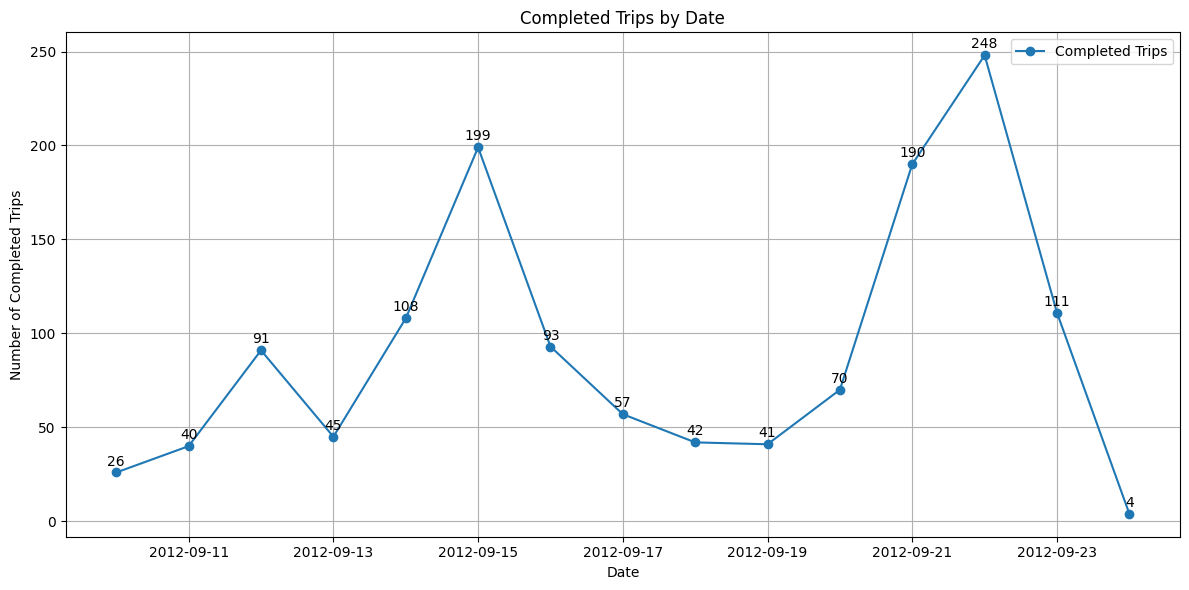

In [10]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_completed_trips, marker='o', label='Completed Trips')

# Add data labels
for x, y in daily_completed_trips.items():
    plt.annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

plt.title('Completed Trips by Date')
plt.xlabel('Date')
plt.ylabel('Number of Completed Trips')
plt.grid()
plt.legend()
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

##### 2.What was the highest number of completed trips within a 24 hour period?

In [11]:
daily_completed_trips_max = daily_completed_trips.max()
print(f"Highest number of completed trips within 24 hours period: {daily_completed_trips_max}")

Highest number of completed trips within 24 hours period: 248


#####  3.Which hour of the day had the most requests during the two week period?


In [13]:
# Group by 'Time (Local)' and sum 'Requests'
hourly_requests = df.groupby('Time (Local)')['Requests'].sum()

# Print each time and its total requests
for time, requests in hourly_requests.items():
    print(f"{time}: {requests}")

most_requested_hour = hourly_requests.idxmax()
most_requests = hourly_requests.max()

print(f"Hour with most requests: {most_requested_hour} ({most_requests} requests)")

0: 142
1: 96
2: 100
3: 35
4: 9
5: 14
6: 28
7: 22
8: 29
9: 26
10: 28
11: 47
12: 53
13: 55
14: 71
15: 71
16: 82
17: 98
18: 119
19: 156
20: 107
21: 112
22: 174
23: 184
Hour with most requests: 23 (184 requests)


##### Visualization - Total Requests by Hour of Day

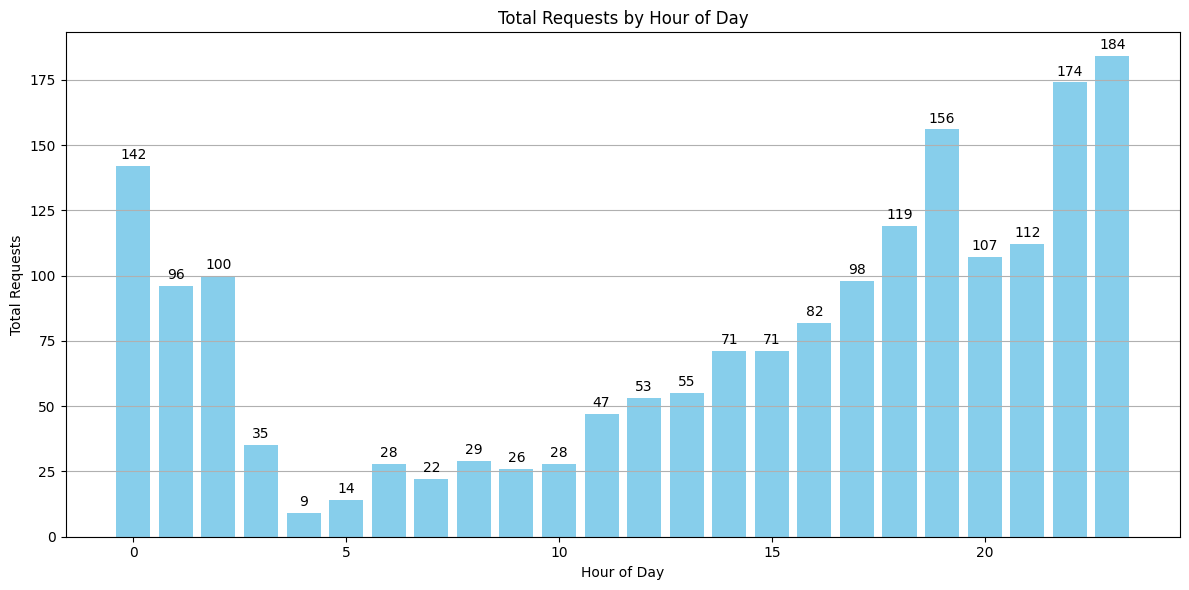

In [14]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(hourly_requests.index, hourly_requests, color='skyblue')

# Add data labels
for x, y in hourly_requests.items():
    plt.annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

plt.title('Total Requests by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Requests')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

##### 4.What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [15]:
# Inspect the dataset for debugging
# print(df[['Weekday', 'Time (Local)', 'Zeroes']].head(20))

# Debugging: Ensure columns are numeric
# print("Data Types:\n", df.dtypes)

# Weekend filter
weekend_filter = (
    ((df['Weekday'] == 4) & (df['Time (Local)'] >= 17)) |  # Friday after 5 PM
    (df['Weekday'] == 5) |                               # All Saturday
    ((df['Weekday'] == 6) & (df['Time (Local)'] <= 3))    # Sunday until 3 AM
)

# Check the filtered rows
filtered_weekend_data = df.loc[weekend_filter, ['Weekday', 'Time (Local)', 'Zeroes']]
print("\nFiltered Weekend Data:\n", filtered_weekend_data)

# Calculate total zeroes during the weekend
weekend_zeroes = filtered_weekend_data['Zeroes'].sum()

# Calculate total zeroes for the entire dataset
total_zeroes = df['Zeroes'].sum()

# Calculate the percentage
percentage_weekend_zeroes = (weekend_zeroes / total_zeroes) * 100

# Output the results
print(f"Total Zeroes: {total_zeroes}")
print(f"Weekend Zeroes: {weekend_zeroes}")
print(f"Percentage of Zeroes on Weekend: {percentage_weekend_zeroes:.2f}%")


Filtered Weekend Data:
      Weekday  Time (Local)  Zeroes
106        4            17       4
107        4            18       2
108        4            19       6
109        4            20       4
110        4            21       6
..       ...           ...     ...
304        5            23      59
305        6             0      25
306        6             1       1
307        6             2       4
308        6             3       1

[70 rows x 3 columns]
Total Zeroes: 1429
Weekend Zeroes: 644
Percentage of Zeroes on Weekend: 45.07%


##### 5.What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [24]:
# Calculate total completed trips and total unique drivers
# total_completed_trips = df['Completed Trips'].sum()
# total_unique_drivers = df['Unique Drivers'].sum()

df['Unit'] = df['Completed Trips'] / df['Unique Drivers']


# Calculate the weighted average ratio
# weighted_avg_ratio = total_completed_trips / total_unique_drivers
weighted_avg_ratio = (df['Unit']*df['Completed Trips'].sum()) / df['Completed Trips'].sum()

# Output the result
# print(f"Total Completed Trips: {total_completed_trips}")
# print(f"Total Unique Drivers: {total_unique_drivers}")
print(f"Weighted Average Ratio of Completed Trips Per Driver: {weighted_avg_ratio}")

Weighted Average Ratio of Completed Trips Per Driver: 0      0.222222
1      0.142857
2      0.000000
3      0.000000
4      0.363636
         ...   
331         NaN
332         NaN
333         NaN
334    0.333333
335    0.285714
Name: Unit, Length: 336, dtype: float64


##### 6.In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

Busiest 8-Hour Period:
          Date  Time (Local)  Eyeballs  Zeroes  Completed Trips  Requests  \
274 2012-09-21            17        68      25               26        26   
275 2012-09-21            18        62       6               15        22   
276 2012-09-21            19        47       3               16        19   
277 2012-09-21            20        63       8               14        21   
278 2012-09-21            21        59       8               12        17   
279 2012-09-21            22        73       4               23        29   
280 2012-09-21            23        94      30               36        46   
281 2012-09-22             0        62       4               19        27   

     Unique Drivers  Weekday      Unit  Rolling Requests  
274              20        4  1.300000              65.0  
275              26        4  0.576923              86.0  
276              30        4  0.533333             104.0  
277              28        4  0.500000         

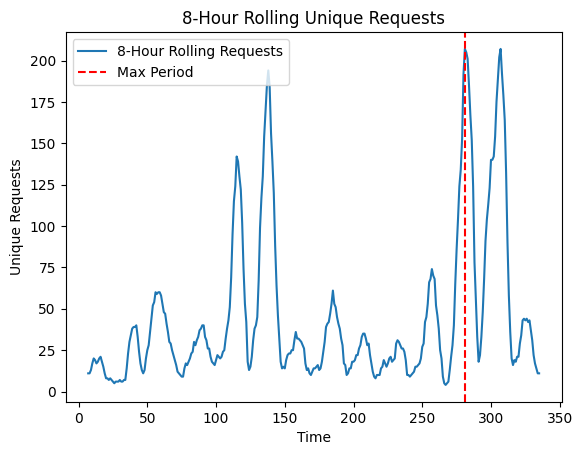

In [25]:
# Rolling sum of unique requests for an 8-hour window
df['Rolling Requests'] = df['Requests'].rolling(window=8).sum()

# Find the time with the maximum requests
max_requests_time = df['Rolling Requests'].idxmax()
busiest_period = df.iloc[max_requests_time-7:max_requests_time+1]

# Output the results
print("Busiest 8-Hour Period:")
print(busiest_period)

# Visualization
plt.plot(df['Rolling Requests'], label='8-Hour Rolling Requests')
plt.axvline(max_requests_time, color='red', linestyle='--', label='Max Period')
plt.xlabel('Time')
plt.ylabel('Unique Requests')
plt.title('8-Hour Rolling Unique Requests')
plt.legend()
plt.show()

##### 7.True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.

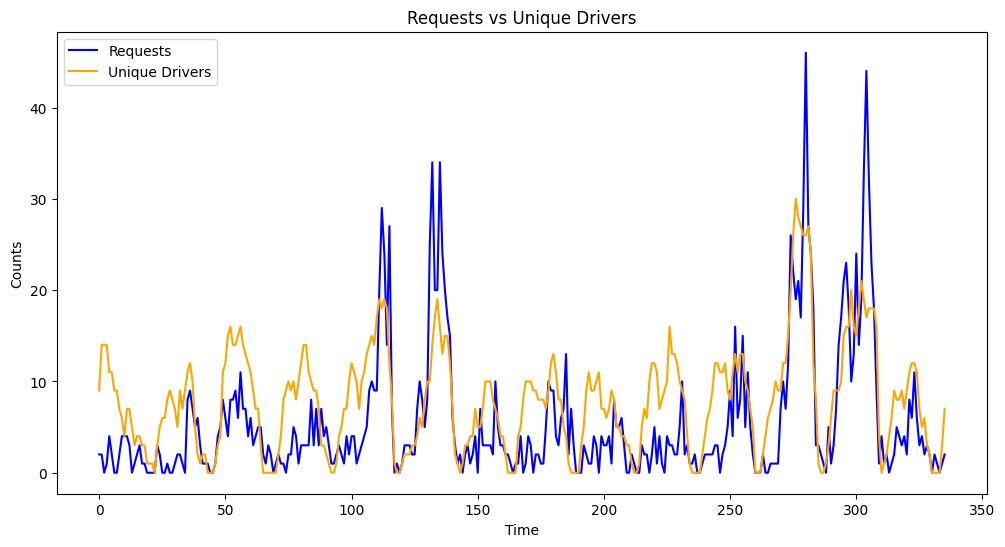

Correlation between Requests and Unique Drivers: 0.69
True: Driver supply generally increases with demand.


In [26]:
# Correlation between Requests and Unique Drivers
correlation = df['Requests'].corr(df['Unique Drivers'])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Requests'], label='Requests', color='blue')
plt.plot(df['Unique Drivers'], label='Unique Drivers', color='orange')
plt.title('Requests vs Unique Drivers')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Output the correlation and logical conclusion
print(f"Correlation between Requests and Unique Drivers: {correlation:.2f}")
if correlation > 0.5:
    print("True: Driver supply generally increases with demand.")
else:
    print("False: Driver supply does not always increase with demand.")


##### 8.In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

72-Hour Period with the Highest Ratio:
          Date  Time (Local)  Eyeballs  Zeroes  Completed Trips  Requests  \
118 2012-09-15             5         1       1                0         1   
119 2012-09-15             6         3       3                0         0   
120 2012-09-15             7         9       7                1         1   
121 2012-09-15             8        13      10                2         3   
122 2012-09-15             9        14       9                1         3   
..         ...           ...       ...     ...              ...       ...   
185 2012-09-18             0        28      18                3        13   
186 2012-09-18             1         4       2                2         2   
187 2012-09-18             2         9       9                0         7   
188 2012-09-18             3         4       4                0         3   
189 2012-09-18             4         1       1                0         0   

     Unique Drivers  Weekday  Unit  

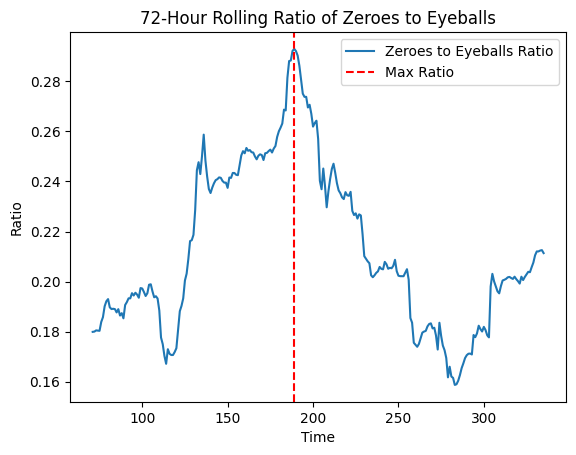

In [27]:
# Rolling sum of Zeroes and Eyeballs
df['Rolling Zeroes'] = df['Zeroes'].rolling(window=72).sum()
df['Rolling Eyeballs'] = df['Eyeballs'].rolling(window=72).sum()

# Calculate the ratio
df['Zeroes to Eyeballs Ratio'] = df['Rolling Zeroes'] / df['Rolling Eyeballs']

# Find the maximum ratio
max_ratio_time = df['Zeroes to Eyeballs Ratio'].idxmax()
highest_ratio_period = df.iloc[max_ratio_time-71:max_ratio_time+1]

# Output the results
print("72-Hour Period with the Highest Ratio:")
print(highest_ratio_period)

# Visualization
plt.plot(df['Zeroes to Eyeballs Ratio'], label='Zeroes to Eyeballs Ratio')
plt.axvline(max_ratio_time, color='red', linestyle='--', label='Max Ratio')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('72-Hour Rolling Ratio of Zeroes to Eyeballs')
plt.legend()
plt.show()


##### 9.If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing

The best hour to add 5 drivers is: 23


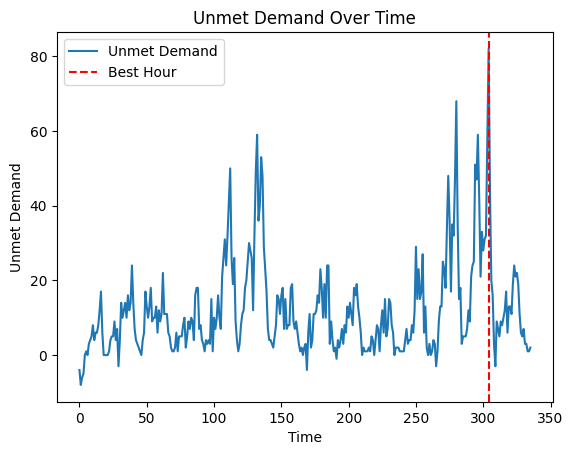

In [28]:
# Calculate unmet demand (Eyeballs - Unique Drivers)
df['Unmet Demand'] = df['Eyeballs'] - df['Unique Drivers']

# Find the hour with the highest unmet demand
best_hour = df['Unmet Demand'].idxmax()

# Output the result
print(f"The best hour to add 5 drivers is: {df.loc[best_hour, 'Time (Local)']}")

# Visualization
plt.plot(df['Unmet Demand'], label='Unmet Demand')
plt.axvline(best_hour, color='red', linestyle='--', label='Best Hour')
plt.xlabel('Time')
plt.ylabel('Unmet Demand')
plt.title('Unmet Demand Over Time')
plt.legend()
plt.show()


##### 10.True or False: There is exactly two weeks of data in this analysis


In [29]:
# Check date range
start_date = pd.to_datetime(df['Date'].min())
end_date = pd.to_datetime(df['Date'].max())

# Calculate number of days
num_days = (end_date - start_date).days + 1

# Output the result
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Total Days: {num_days}")
print("True" if num_days == 14 else "False")


Start Date: 2012-09-10 00:00:00
End Date: 2012-09-24 00:00:00
Total Days: 15
False


##### 11.Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.


The best end time is: 4:00


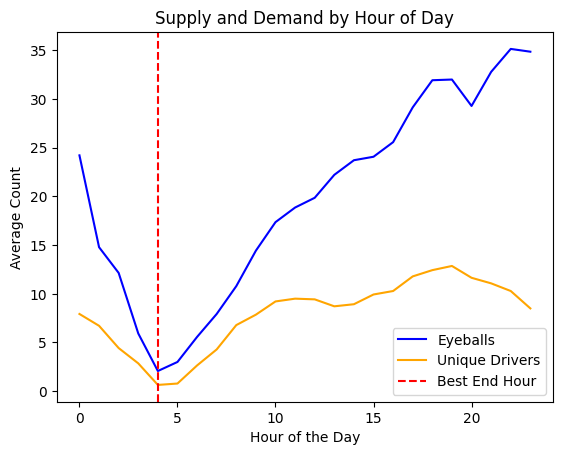

In [30]:
# Aggregate supply and demand by time of day
hourly_avg = df.groupby('Time (Local)')[['Eyeballs', 'Unique Drivers']].mean()

# Find the hour with the lowest average supply and demand
best_end_hour = hourly_avg.sum(axis=1).idxmin()

# Output the result
print(f"The best end time is: {best_end_hour}:00")

# Visualization
plt.plot(hourly_avg['Eyeballs'], label='Eyeballs', color='blue')
plt.plot(hourly_avg['Unique Drivers'], label='Unique Drivers', color='orange')
plt.axvline(best_end_hour, color='red', linestyle='--', label='Best End Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Supply and Demand by Hour of Day')
plt.legend()
plt.show()

##### Save results to a summary text file

In [32]:
summary_path = 'analysis_summary.txt'
with open(summary_path, 'w') as f:
    f.write(f"1. Date with most completed trips: {max_completed_trips_date} ({max_completed_trips} trips)\n")
    f.write(f"2. Highest number of completed trips in 24 hours: {daily_completed_trips_max}\n")
    f.write(f"3. Hour with most requests: {most_requested_hour} ({most_requests} requests)\n")
    f.write(f"4. Percentage of Zeroes on Weekend: {percentage_weekend_zeroes:.2f}%\n")
    f.write(f"5. Weighted Average Ratio of Completed Trips Per Driver: {weighted_avg_ratio}\n")
    f.write(f"=============================================\n")
    f.write(f"6. Busiest 8-Hour Period: {busiest_period}\n")
    f.write(f"=============================================\n")
    f.write(f"7. Correlation between Requests and Unique Drivers: {correlation:.2f}\n")
    f.write(f"8. 72-Hour Period with the Highest Ratio of Zeroes to Eyeballs: {highest_ratio_period}\n")
    f.write(f"=============================================\n")
    f.write(f"9. The best hour to add 5 drivers is: {df.loc[best_hour, 'Time (Local)']}\n")
    f.write(f"10. Total Days: {num_days}\n")
    f.write(f"11. The best end time is: {best_end_hour}:00\n")

print(f"Results saved to {summary_path}")

Results saved to analysis_summary.txt
